<a href="https://colab.research.google.com/github/alshubati99/Data-Science-Study/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset “NHANES0910modified.csv”.
The columns named as ClassLabel, Gender, Race, Education, FamilyHistory and HighBloodSugar are categorical and
the others are numerical.

In [5]:
df = pd.read_csv("/content/NHANES0910modified.csv")

Display the top 10 rows of the dataset

In [6]:
df.head(10)

,ClassLabel,Gender,Age,Race,Education,FamilyHistory,HighBloodSugar,BMI,WaistCircumference,SystolicBP,DiastolicBP,LDL,HDL,Triglycerides
0,Negative,1,44,3,3.0,1,1,29.10,106.6,119,88,113,37,235
1,Negative,2,44,1,2.0,2,1,25.06,82.3,130,86,138,63,61
2,Negative,1,22,3,5.0,1,1,28.07,94.5,120,87,96,57,111
3,Negative,2,35,3,4.0,1,1,20.29,71.9,110,64,93,89,58
4,Negative,1,54,2,5.0,2,1,36.32,116.4,92,42,110,62,71
5,Negative,1,54,4,5.0,2,1,26.62,92.6,142,96,99,86,85
6,Negative,2,25,1,2.0,1,1,25.59,86.4,104,62,78,60,73
7,Negative,1,80,3,4.0,1,1,35.77,130.8,98,38,137,41,101
8,Negative,1,49,1,2.0,1,1,29.13,100.9,122,92,112,48,159
9,Negative,2,37,2,4.0,2,1,21.16,79.7,103,60,102,54,57


Count and report the number of missing values in each variable

In [7]:
df.isna().sum()

ClassLabel             0
Gender                 0
Age                    0
Race                   0
Education             12
FamilyHistory          0
HighBloodSugar         0
BMI                    9
WaistCircumference     0
SystolicBP             0
DiastolicBP            0
LDL                    0
HDL                    0
Triglycerides          0
dtype: int64

Impute the missing values in categorical variables by their most frequent values

In [8]:
df['Education'].fillna(df['Education'].mode(), inplace = True)

Impute the missing values in continuous variables by their mean values

In [9]:
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

Report the number of positive and negative samples in the dataset

In [10]:
print("Number of positive samples")
print(df[df["ClassLabel"] == "Positive"].shape[0])
print("Number of negative samples")
print(df[df["ClassLabel"] == "Negative"].shape[0])

Number of positive samples
728
Number of negative samples
775


Report the number positive samples having Gender =1 and Race =2

In [11]:
print(df[(df["ClassLabel"]=="Positive") & (df["Gender"]==1) & (df["Race"]==2)].shape[0])

40


Which Race value is the most frequent in Negative samples

In [13]:
df["Race"].value_counts()

3    794
1    270
4    206
2    161
5     72
Name: Race, dtype: int64

What is the average BMI and Age value of the samples having Education =3





In [16]:
df[df["Education"]==3].BMI.mean()

29.276166255235008

In [17]:
df[df["Education"]==3].Age.mean()

49.764525993883794

Compute the mean and standard deviation of BMI values for Gender = 1

In [18]:
print(df[df["Gender"]==1]["BMI"].mean())
print(df[df["Gender"]==1]["BMI"].std())

28.49773850117451
5.642778216687597


For the WaistCircumference, compute a pair of boxplots, one for each class (Positive or Negative) specified in the first column of the dataset.

[Text(1, 0, 'Positive'), Text(2, 0, 'Negative')]

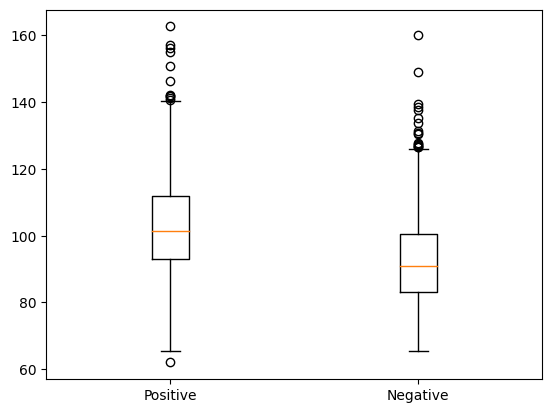

In [19]:
fig, ax = plt.subplots()
ax.boxplot([df[df["ClassLabel"] == 'Positive'].WaistCircumference, df[df["ClassLabel"] == 'Negative'].WaistCircumference])
ax.set_xticklabels(['Positive','Negative'])

Using the "quantile" method, print quartile information for BMI. Verify your results using the describe() method

In [20]:
print('Quantile value for 0.25:')
print(df.BMI.quantile(.25))
print('Quantile value for 0.50:')
print(df.BMI.quantile(.50))
print('Quantile value for 0.75:')
print(df.BMI.quantile(.75))
df.describe()

Quantile value for 0.25:
24.16
Quantile value for 0.50:
27.5
Quantile value for 0.75:
31.715


,Gender,Age,Race,Education,FamilyHistory,HighBloodSugar,BMI,WaistCircumference,SystolicBP,DiastolicBP,LDL,HDL,Triglycerides
count,1503.000000,1503.000000,1503.000000,1491.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,1.541583,49.231537,2.766467,3.428571,1.333333,1.025948,28.416365,97.555888,120.359947,68.152362,118.815702,55.480373,117.979375
std,0.498434,17.646239,1.049072,1.275253,0.471561,0.159033,6.240718,15.358587,17.108261,11.749383,34.656330,16.125324,60.615212
min,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,14.590000,62.000000,76.000000,24.000000,29.000000,21.000000,26.000000
25%,1.000000,34.000000,2.000000,3.000000,1.000000,1.000000,24.160000,86.500000,108.000000,61.000000,94.000000,44.000000,75.000000
50%,2.000000,48.000000,3.000000,4.000000,1.000000,1.000000,27.500000,96.100000,118.000000,68.000000,117.000000,53.000000,103.000000
75%,2.000000,63.000000,3.000000,4.000000,2.000000,1.000000,31.715000,106.350000,130.000000,76.000000,140.000000,65.000000,146.000000
max,2.000000,80.000000,5.000000,5.000000,2.000000,2.000000,57.940000,162.700000,210.000000,111.000000,266.000000,133.000000,376.000000


For the Education variable in the dataset, compute the bar-plots for different categories. The bar-plots should present the number of samples having each particular value.

<Axes: xlabel='Education', ylabel='count'>

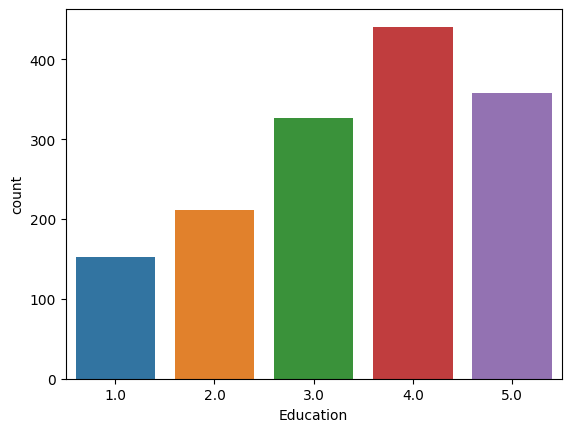

In [21]:
sns.countplot(data = df, x = 'Education')

For BMI and WaistCircumference, compute a scatter plot. Comment on the relation between the two variables

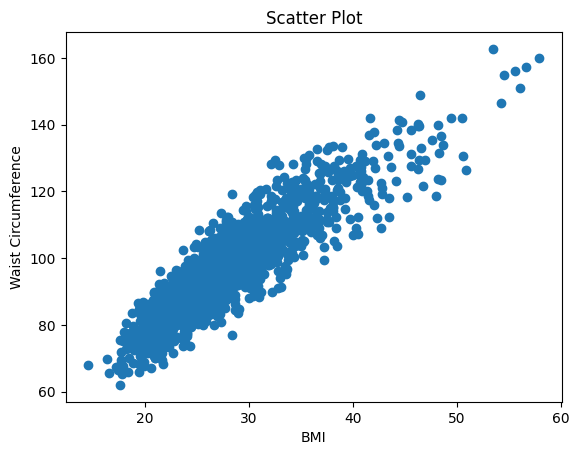

In [22]:
fig, ax = plt.subplots()
ax.set_xlabel('BMI')
ax.set_ylabel('Waist Circumference')
ax.set_title('Scatter Plot')
plt.scatter(df.BMI,df.WaistCircumference)

For SystolicBP and Triglycerides, compute a scatter plot. Comment on the relation between the two variables

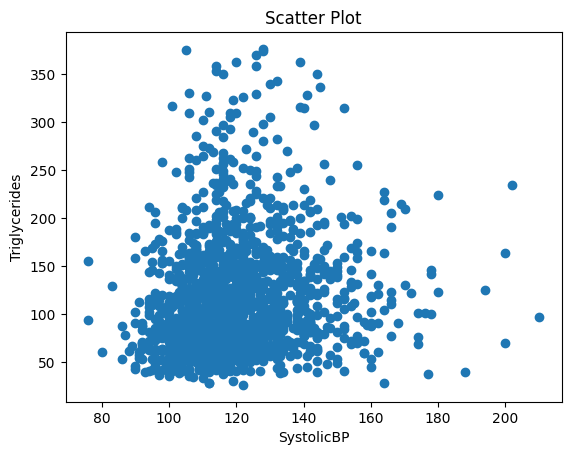

In [23]:
fig, ax = plt.subplots()
ax.set_xlabel('SystolicBP')
ax.set_ylabel('Triglycerides')
ax.set_title('Scatter Plot')
plt.scatter(df.SystolicBP,df.Triglycerides)